In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random

In [2]:
X_train = pd.read_pickle('data/x_train1.pkl')
y_train = pd.read_pickle('data/y_train1.pkl')

X_train_10839 = X_train[X_train.NORAD_CAT_ID == 10839]
X_train_10839_idx = X_train_10839.index

X_test = pd.read_pickle('data/x_test1.pkl')
y_test = pd.read_pickle('data/y_test1.pkl')

X_test_27944 = X_test[X_test.NORAD_CAT_ID == 27944]
X_test_27944_idx = X_test_27944.index

Loading existing model


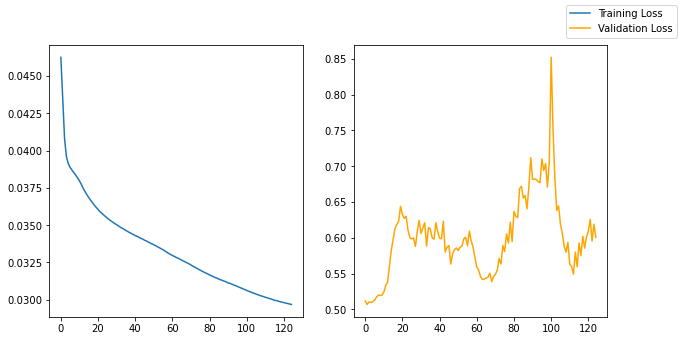

In [37]:
import train

# configurations = {
#     'model_identifier' : "full_1",
#     'model_path' : './data',
#     'device' : 'cpu',
#     'random_seed' : 0,
#     'lr' : 0.01,
#     'momentum' : 0.9,
#     'weight_decay' : 1e-6,
#     'max_epochs' : 500,
#     'do_validate' : True,
#     'model_definition' : {
#         'layer1' : 50, 'relu1' : True, #'drop1' : 0.2,
#         'layer2' : 30, 'relu2' : True, #'drop2' : 0.2,
#         'layer3' : 30, 'relu3' : True, #'drop3' : 0.2,
#         'layer4' : 30, 'relu4' : True, #'drop4' : 0.5,
#         'layer5' : 20, 'relu5' : True, #'drop5' : 0.5,
#         'layer6' : 20, 'relu6' : True, #'drop6' : 0.5,
#         'layer7' : 20, 'relu7' : True, #'drop7' : 0.5,
#         'layer8' : 10, 'relu8' : True, #'drop8' : 0.5,
#         'layer9' : 10, 'relu9' : True, #'drop9' : 0.5,
#     },
#     'train_params' : {
#         'batch_size': 2000,
#         'shuffle': True,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
#     'test_params' : {
#         'batch_size': 20000,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
# }

configurations = {
    'model_identifier' : "full_remote_2",
    'model_path' : './data',
    'device' : 'cpu',
    'random_seed' : 0,
    'lr' : 0.1,
    'momentum' : 0.9,
    'weight_decay' : 1e-6,
    'max_epochs' : 100,
    'do_validate' : True,
    'model_definition' : {
        'layer1' : 500, 'relu1' : True, #'drop1' : 0.2,
        'layer2' : 300, 'relu2' : True, #'drop2' : 0.2,
        'layer3' : 300, 'relu3' : True, #'drop3' : 0.2,
        'layer4' : 300, 'relu4' : True, #'drop4' : 0.5,
        'layer5' : 200, 'relu5' : True, #'drop5' : 0.5,
        'layer6' : 200, 'relu6' : True, #'drop6' : 0.5,
        'layer7' : 200, 'relu7' : True, #'drop7' : 0.5,
        'layer8' : 100, 'relu8' : True, #'drop8' : 0.5,
        'layer9' : 100, 'relu9' : True, #'drop9' : 0.5,
    },
    'train_params' : {
        'batch_size': 2000,
        'shuffle': True,
        'num_workers': 2,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 20000,
        'num_workers': 2,
        'pin_memory': True,
    },
}

# configurations = {
#     'model_identifier' : "full_remote_3",
#     'model_path' : './data',
#     'device' : 'cpu',
#     'random_seed' : 0,
#     'lr' : 0.03,
#     'momentum' : 0.9,
#     'weight_decay' : 1e-6,
#     'max_epochs' : 500,
#     'do_validate' : True,
#     'model_definition' : {
#         'layer1' : 100, 'relu1' : True, #'drop1' : 0.2,
#         'layer2' : 150, 'relu2' : True, #'drop2' : 0.2,
#         'layer3' : 150, 'relu3' : True, #'drop3' : 0.2,
#         'layer4' : 200, 'relu4' : True, #'drop4' : 0.5,
#         'layer5' : 300, 'relu5' : True, #'drop5' : 0.5,
#         'layer6' : 200, 'relu6' : True, #'drop6' : 0.5,
#         'layer7' : 150, 'relu7' : True, #'drop7' : 0.5,
#         'layer8' : 150, 'relu8' : True, #'drop8' : 0.5,
#         'layer9' : 100, 'relu9' : True, #'drop9' : 0.5,
#     },
#     'train_params' : {
#         'batch_size': 2000,
#         'shuffle': True,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
#     'test_params' : {
#         'batch_size': 20000,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
# }

# configurations = {
#     'model_identifier' : "full_remote_4",
#     'model_path' : './data',
#     'device' : 'cpu',
#     'random_seed' : 0,
#     'lr' : 0.06,
#     'momentum' : 0.9,
#     'weight_decay' : 1e-6,
#     'max_epochs' : 500,
#     'do_validate' : True,
#     'model_definition' : {
#         'layer1' : 1000, 'relu1' : True, #'drop1' : 0.2,
#         'layer2' : 1500, 'relu2' : True, #'drop2' : 0.2,
#         'layer3' : 1500, 'relu3' : True, #'drop3' : 0.2,
#         'layer4' : 2000, 'relu4' : True, #'drop4' : 0.5,
#         'layer5' : 2000, 'relu5' : True, #'drop5' : 0.5,
#         'layer6' : 2000, 'relu6' : True, #'drop6' : 0.5,
#         'layer7' : 5000, 'relu7' : True, #'drop7' : 0.5,
#         'layer8' : 5000, 'relu8' : True, #'drop8' : 0.5,
#         'layer9' : 5000, 'relu9' : True, #'drop9' : 0.5,
#         'layer10' : 2000, 'relu10' : True, #'drop9' : 0.5,
#         'layer11' : 2000, 'relu11' : True, #'drop9' : 0.5,
#         'layer12' : 2000, 'relu12' : True, #'drop9' : 0.5,
#         'layer13' : 1500, 'relu13' : True, #'drop9' : 0.5,
#         'layer14' : 1500, 'relu14' : True, #'drop9' : 0.5,
#         'layer15' : 1000, 'relu15' : True, #'drop9' : 0.5,
#     },
#     'train_params' : {
#         'batch_size': 2000,
#         'shuffle': True,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
#     'test_params' : {
#         'batch_size': 20000,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
# }

model, _, _, mean_losses, _ = train.load_model_with_config(configurations)
    
tl, vl = zip(*mean_losses)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(tl, label="Training Loss")
ax2.plot(vl, label="Validation Loss", color='orange')

fig.legend()
plt.show()

In [24]:
tl

(0.04628354658479448, 0.046238878771726874)

In [32]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

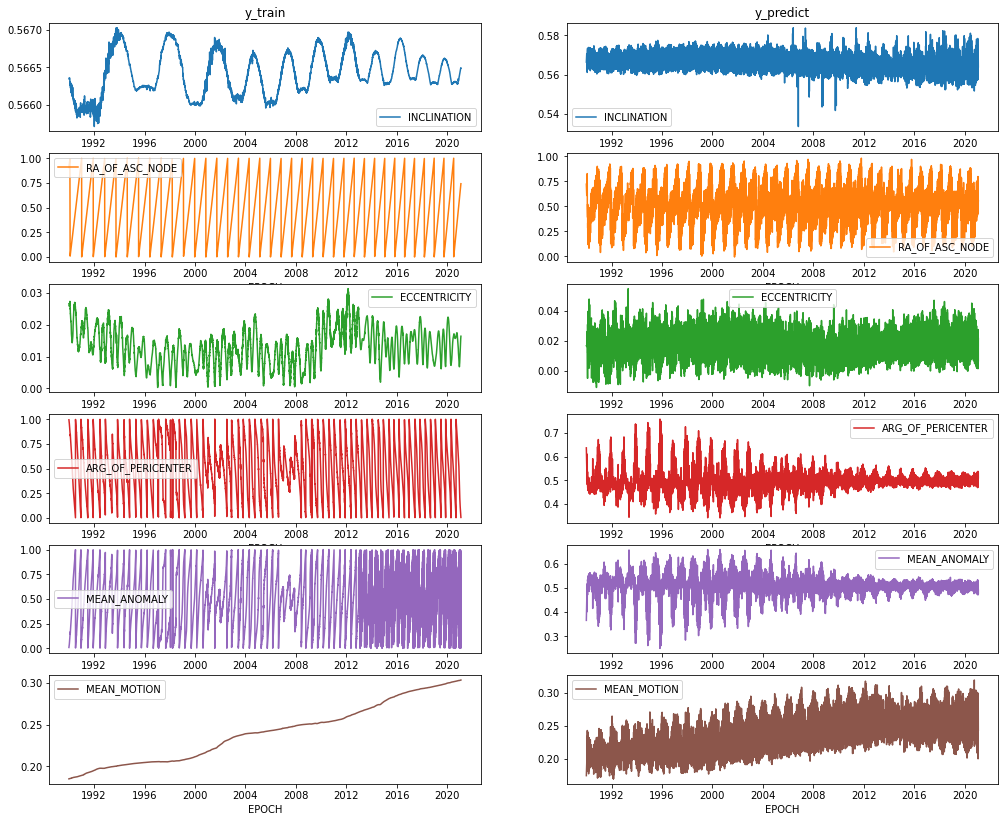

In [33]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_train_10839 = y_train.loc[X_train_10839_idx]
y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_train_10839[cols], y_train_10839)
y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

In [34]:
# X_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, title='X_test')
# plt.show()

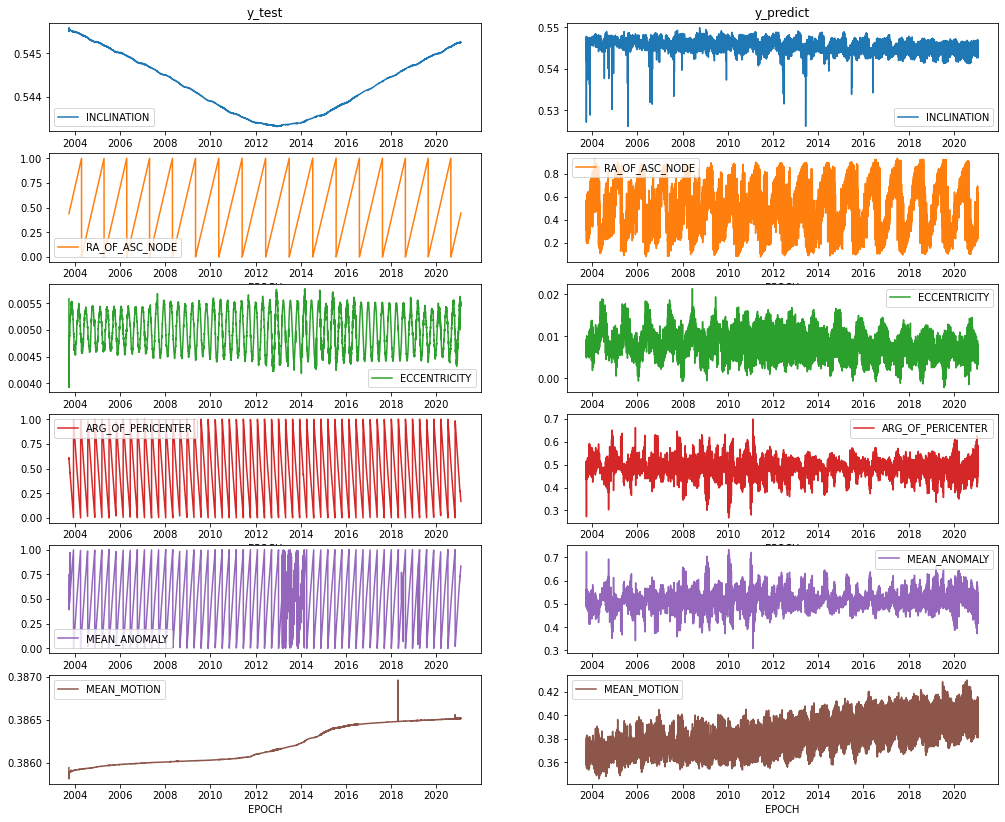

In [35]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944)
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()